# Исследование A/B-тестирования нового алгоритма рекомендаций в развлекательном приложении

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-15 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
import pandas as pd

In [2]:
sessions_history = pd.read_csv('/datasets/sessions_project_history.csv')

In [3]:
sessions_history.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [4]:
sessions_history.groupby('user_id')['session_id'].count().sort_values(ascending = False)

user_id
10E0DEFC1ABDBBE0    10
6A73CB5566BB494D    10
8A60431A825D035B     9
D11541BAC141FB94     9
5BCFE7C4DCC148E9     9
                    ..
1DF13BB1953B3497     1
628502A3CE7E0A3C     1
1DEEF40DEFBD0C65     1
AC08479B7472C628     1
8A0882B6715D9EE5     1
Name: session_id, Length: 134039, dtype: int64

In [5]:
user_data = sessions_history[sessions_history['user_id'] == '10E0DEFC1ABDBBE0']
user_data

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

In [6]:
daily_stats = sessions_history.groupby('session_date').agg( total_users=('user_id', 'nunique'),             # Уникальные пользователи за день
                                                       registered_users=('registration_flag', 'sum')).reset_index()  # Число зарегистрированных

In [7]:
daily_stats

,session_date,total_users,registered_users
0,2025-08-11,3919,169
1,2025-08-12,6056,336
2,2025-08-13,8489,464
3,2025-08-14,10321,625
4,2025-08-15,14065,840
5,2025-08-16,12205,916
6,2025-08-17,11200,833
7,2025-08-18,10839,860
8,2025-08-19,12118,831
9,2025-08-20,13514,1008


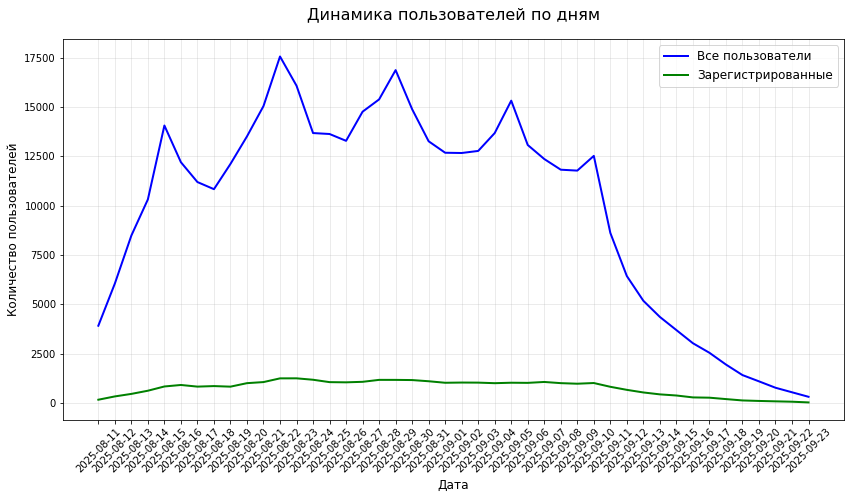

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14, 7))

plt.plot(daily_stats['session_date'], 
         daily_stats['total_users'], 
         label='Все пользователи', 
         color='blue', 
         linewidth=2)

plt.plot(daily_stats['session_date'], 
         daily_stats['registered_users'], 
         label='Зарегистрированные', 
         color='green', 
         linewidth=2)

plt.title('Динамика пользователей по дням', fontsize=16, pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45)

plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

С 11 августа по 30 августа наблюдается устойчивый рост как общего числа пользователей (total_users), так и зарегистрированных (registered_users). Пик активности приходится на 22 августа (17 563 пользователя), после чего начинается постепенное снижение.

С 1 сентября тренд меняется на нисходящий, а с 11 сентября происходит резкий обвал (с 12 526 до 8 623 пользователей), после чего активность продолжает стремительно снижаться.
Данные за август указывают на возможный сезонный всплеск (например, запуск продукта, маркетинговая кампания, начало учебного года и т. д.).

Резкий спад после 11 сентября может быть связан с:

- Окончанием рекламной акции/кампании.

- Техническими проблемами (например, сбои в работе сервиса).

- Внешними факторами (изменение рыночных условий, выход конкурента).

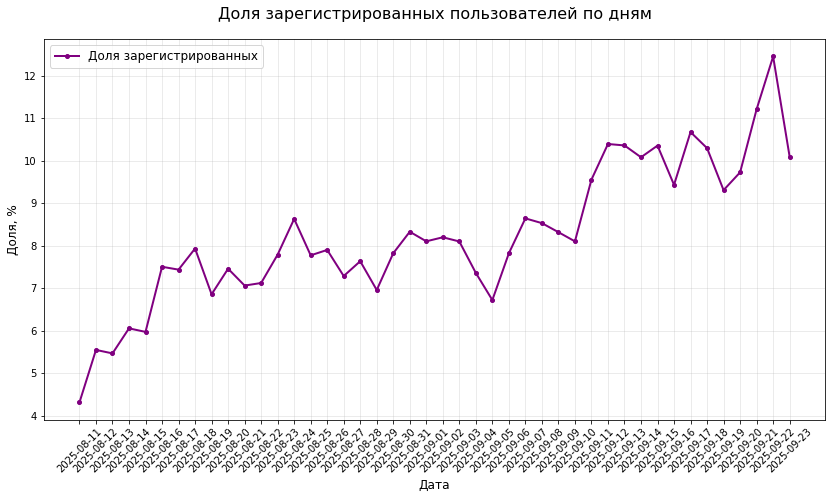

In [9]:
# Рассчитываем долю зарегистрированных пользователей
daily_stats['registration_ratio'] = (daily_stats['registered_users'] / daily_stats['total_users']) * 100

# Создаем фигуру
plt.figure(figsize=(14, 7))

# Строим график доли
plt.plot(daily_stats['session_date'], 
         daily_stats['registration_ratio'], 
         label='Доля зарегистрированных', 
         color='purple', 
         linewidth=2,
         marker='o',
         markersize=4)

plt.title('Доля зарегистрированных пользователей по дням', fontsize=16, pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Доля, %', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

Доля зарегистрированных пользователей (registered_users) от общего числа (total_users) постепенно растет:

11 августа: 4.3% (169 / 3919)

22 августа: 7.1% (1251 / 17563)

11 сентября: 9.6% (824 / 8623) – несмотря на падение активности, доля регистраций увеличивается.

Это может говорить о:

- Улучшении вовлеченности пользователей.

- Изменении стратегии (например, обязательная регистрация для доступа к функционалу).

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы на то, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29160 сессиях, две страницы в 105536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

In [10]:
sessions_per_page = sessions_history.groupby('page_counter')['session_id'].count().sort_values(ascending = False)
sessions_per_page

page_counter
3    166690
4    105569
2    105536
1     29160
5     26288
6      2589
7        92
Name: session_id, dtype: int64

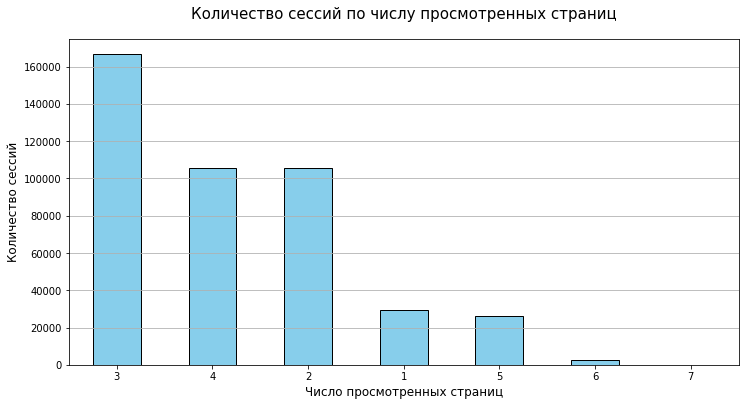

In [11]:
plt.figure(figsize=(12, 6))
sessions_per_page.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Количество сессий по числу просмотренных страниц', fontsize=15, pad=20)
plt.xlabel('Число просмотренных страниц', fontsize=12)
plt.ylabel('Количество сессий', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')

Большинство сессий заканчиваются на 3-й странице (166 690) – это пиковое значение.

Возможные причины:

- Пользователи активно взаимодействуют с контентом до 3-й страницы, но затем уходят.

- На 3-й странице может находиться ключевой элемент (например, форма регистрации, платный доступ или финальный шаг воронки).

После 3-й странице наблюдается значительное падение.

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий ко всем сессиям по дням за весь период наблюдения.

In [12]:
# Для создания нового столбца 'good_session' создадим булеву маску (True/False) и с помощью .astype(int) - преобразуем True в 1, False в 0
sessions_history['good_session'] = (sessions_history['page_counter'] >= 4).astype(int)
display(sessions_history[['session_id', 'page_counter', 'good_session']].head())

,session_id,page_counter,good_session
0,F9AF61A0C2023832,3,0
1,85003A206CBDAC6F,4,1
2,3677423E49D72DEE,4,1
3,956B45F5915CA225,4,1
4,83BF0DA35F9F1F40,3,0


In [13]:
# Проверим тип данных с столбце 'session_date'
print(sessions_history['session_date'].dtype)

object


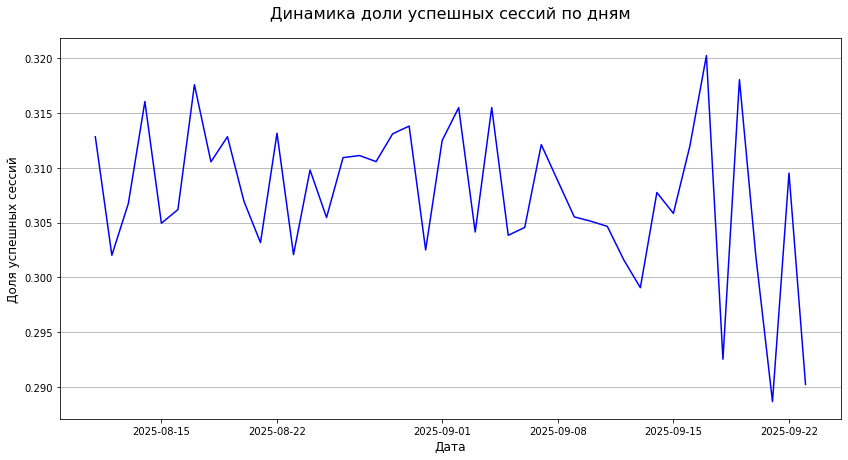

In [14]:
# Группируем по дням и считаем среднюю долю 'good_session'
daily_good_sessions = sessions_history.groupby(
    pd.to_datetime(sessions_history['session_date'])).agg(
    success_rate=('good_session', 'mean')).reset_index()

plt.figure(figsize=(14, 7))

plt.plot(daily_good_sessions['session_date'], 
         daily_good_sessions['success_rate'], 
         color='blue')

plt.title('Динамика доли успешных сессий по дням', fontsize=16, pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Доля успешных сессий', fontsize=12)
plt.grid(axis='y')
plt.show()    

Доля успешных сессий по дням достаточно стабильна (30–32%), что говорит о надежности сервиса.
После 11 сентября набюдается небольшое снижение (до 29%), но не критичное.

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика, рассчитать необходимую длительность проведения теста.

#### 2.1. Расчёт размера выборки
В рамках курса вам уже приходилось рассчитывать размеры выборки, используя онлайн-калькуляторы. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего дизайна эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки мы будем использовать метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [15]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 1-beta  # Мощность теста
mde = 0.03  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 17441


#### 2.1. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста, исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [16]:
from math import ceil

# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users = round(sessions_history.groupby(
    pd.to_datetime(sessions_history['session_date']))['user_id'].nunique().mean())

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(sample_size*2/avg_daily_users)

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907 пользователей в день составит 4 дней


### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой можно было бы увидеть возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [17]:
sessions_test_part = pd.read_csv('/datasets/sessions_project_test_part.csv')

In [18]:
# Проверим типы данных
sessions_test_part.dtypes

user_id              object
session_id           object
session_date         object
session_start_ts     object
install_date         object
session_number        int64
registration_flag     int64
page_counter          int64
region               object
device               object
test_group           object
dtype: object

In [19]:
sessions_test_part['session_date'] = pd.to_datetime(sessions_test_part['session_date'])

In [20]:
# Расчитаем количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения
df_grp = (sessions_test_part.groupby(['test_group', 'session_date'])
         .agg({'user_id': 'nunique'}).reset_index())
df_grp

,test_group,session_date,user_id
0,A,2025-10-14,1477
1,B,2025-10-14,1466


In [21]:
# Выведем количество пользователей в группах A и B
a_users = df_grp[df_grp.test_group == 'A'].user_id.values[0]
b_users = df_grp[df_grp.test_group == 'B'].user_id.values[0]

# Рассчитываем процентную разницу
percentage_diff = 100 * (a_users - b_users) / a_users

print(f"Процентная разница между группами A и B: {percentage_diff:.2f}%")

Процентная разница между группами A и B: 0.74%


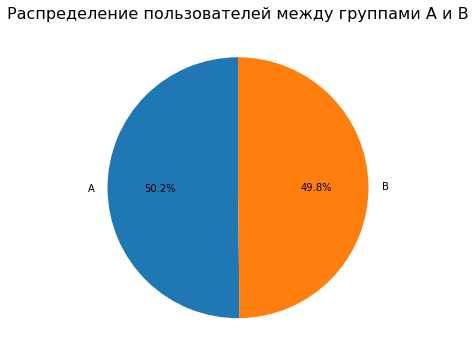

In [22]:
# Построим круговую диаграмму распределения пользователей между группами А и Б
groups = ['A', 'B']
users = [a_users, b_users]

plt.figure(figsize=(8, 6))
plt.pie(users, labels=groups, autopct='%1.1f%%', startangle=90)
plt.title('Распределение пользователей между группами A и B', fontsize=16)
plt.show()

- Процентная разница между группами A и B составляет 0.74% (незначительная).

- Визуализация подтверждает, что группы очень близки по размеру.

- Если разница <5%, можно считать группы статистически схожими

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [23]:
# Выберем пользователей из групп А и В
a_gr = sessions_test_part[sessions_test_part['test_group'] == 'A']['user_id']
b_gr = sessions_test_part[sessions_test_part['test_group'] == 'B']['user_id']
# Проверим пересечение пользователей в группах А и В
intersection = list(set(a_gr) & set(b_gr))
print(f"Количество пользователей в обеих группах: {len(intersection)}")

Количество пользователей в обеих группах: 0


#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройства и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


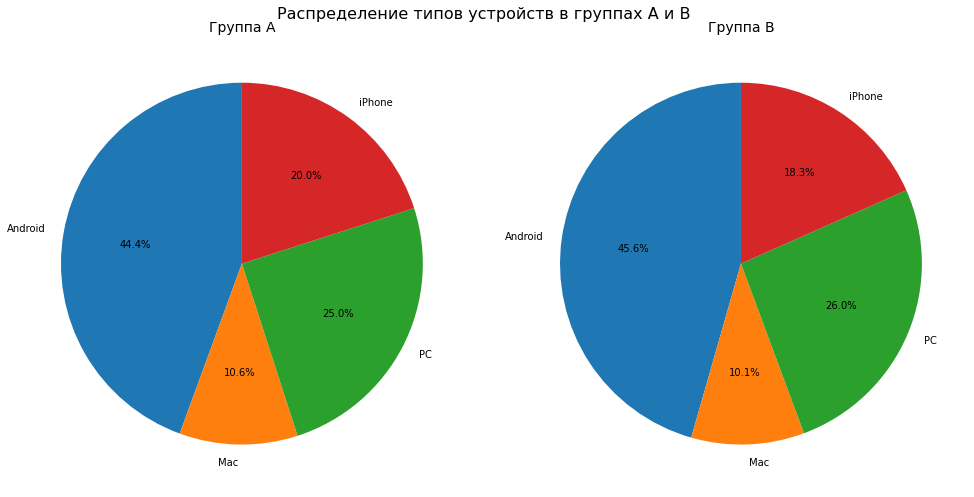

In [24]:
# Группируем данные по тестовой группе и типу устройства
device_distribution = sessions_test_part.groupby(['test_group', 'device'])['user_id'].nunique().unstack()

# Данные для групп A и B
group_a_devices = device_distribution.loc['A']
group_b_devices = device_distribution.loc['B']

# Создаем график с двумя субплогами
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('Распределение типов устройств в группах A и B', fontsize=16)

# Диаграмма для группы A
ax1.pie(group_a_devices, labels=group_a_devices.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Группа A', fontsize=14)

# Диаграмма для группы B
ax2.pie(group_b_devices, labels=group_b_devices.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Группа B', fontsize=14)

plt.tight_layout()
plt.show()


#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


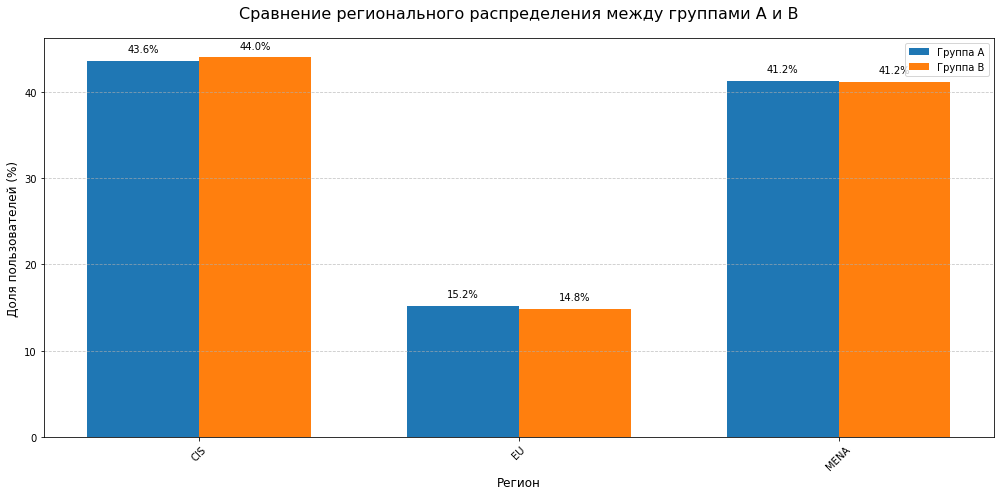

In [25]:
# Группируем данные по тестовой группе и региону
region_dist = sessions_test_part.groupby(['test_group', 'region'])['user_id'].nunique().unstack()

# Нормализуем данные для отображения долей
region_dist_normalized = region_dist.div(region_dist.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 7))

# Настройка позиций столбцов
bar_width = 0.35
x_pos = range(len(region_dist_normalized.columns))

# Столбцы для группы A
plt.bar([x - bar_width/2 for x in x_pos], 
        region_dist_normalized.loc['A'], 
        width=bar_width, 
        label='Группа A')

# Столбцы для группы B
plt.bar([x + bar_width/2 for x in x_pos], 
        region_dist_normalized.loc['B'], 
        width=bar_width, 
        label='Группа B')

plt.title('Сравнение регионального распределения между группами A и B', fontsize=16, pad=20)
plt.xlabel('Регион', fontsize=12)
plt.ylabel('Доля пользователей (%)', fontsize=12)
plt.xticks(x_pos, region_dist_normalized.columns, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем значения на столбцы
for i, (a_val, b_val) in enumerate(zip(region_dist_normalized.loc['A'], region_dist_normalized.loc['B'])):
    plt.text(i - bar_width/2, a_val + 1, f'{a_val:.1f}%', ha='center')
    plt.text(i + bar_width/2, b_val + 1, f'{b_val:.1f}%', ha='center')

plt.tight_layout()
plt.show()


#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Были ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение о том, корректно ли проходит A/B-тест или наблюдаются какие-либо нарушения.


- Различие статистически незначимо (менее 1% (0.74%)), что соответствует требованиям к равномерному распределению.
- Выборки независимы, пользователи не повторяются между группами. Условие корректности A/B-теста соблюдено.
- Распределение по устройствам и регионам равномерное.


Вывод: A/B-тест организован правильно, обнаруженные различия между группами незначимы. Результаты теста можно считать достоверными.

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [26]:
sessions_test = pd.read_csv('/datasets/sessions_project_test.csv')

In [27]:
sessions_test['good_session'] = (sessions_test['page_counter'] >= 4).astype(int)
display(sessions_test[['session_id', 'page_counter', 'good_session']].head())

,session_id,page_counter,good_session
0,C69249E26E58F6E2,3,0
1,66D66D7C9F5181B7,2,0
2,50DE51D42215E74C,2,0
3,5763C0C353C22263,1,0
4,B1AD09F93C1053BC,2,0


#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [28]:
# Cгруппируем данные, чтобы получить количество уникальных сессий для каждой группы (A/B) по дням
daily_sessions = sessions_test.groupby(['session_date', 'test_group'])['session_id'].nunique().unstack()
display(daily_sessions.head())

test_group,A,B
session_date,,
2025-10-14,1502,1628
2025-10-15,2235,2283
2025-10-16,3280,3241
2025-10-17,4089,4054
2025-10-18,5013,5059


Сформулируем гипотезы для проверки: 

H₀ (нулевая гипотеза) — количество уникальных дневных сессий не различается между тестовой и контрольной группами.
H₁ (альтернативная гипотеза) — количество уникальных дневных сессий различается между тестовой и контрольной группами.

In [29]:
# Используем двухвыборочный t-тест (Student's t-test), чтобы проверить, различается ли среднее количество сессий между группами A и B
from scipy.stats import ttest_ind 

# Выборки для групп A и B
group_a = daily_sessions['A'].dropna()
group_b = daily_sessions['B'].dropna()

# Проведение t-теста
t_stat, p_value = ttest_ind(group_a, group_b)

print(f"Результат t-теста: p-value = {p_value:.4f}")
if p_value > 0.05:
    print("Вывод: различий в количестве сессий между группами нет (тест корректен).")
else:
    print("Вывод: обнаружены статистически значимые различия (требуется проверка).")

Результат t-теста: p-value = 0.9382
Вывод: различий в количестве сессий между группами нет (тест корректен).


#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [30]:
# Считаем общее количество сессий и успешных сессий для каждой группы
group_stats = sessions_test.groupby('test_group')['good_session'].agg(['sum', 'count'])
group_stats['proportion'] = group_stats['sum'] / group_stats['count']

# Для групп A и B отдельно
prop_a = group_stats.loc['A', 'proportion']
prop_b = group_stats.loc['B', 'proportion']
diff = prop_b - prop_a  # Разница между B и A

print(f"Доля good_session в группе A: {prop_a:.4f} ({group_stats.loc['A', 'sum']}/{group_stats.loc['A', 'count']})")
print(f"Доля good_session в группе B: {prop_b:.4f} ({group_stats.loc['B', 'sum']}/{group_stats.loc['B', 'count']})")
print(f"Разница (B - A): {diff:.4f}")

Доля good_session в группе A: 0.3077 (15248/49551)
Доля good_session в группе B: 0.3183 (16059/50454)
Разница (B - A): 0.0106


#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [31]:
from statsmodels.stats.proportion import proportions_ztest

# Подготовка данных
successes = [group_stats.loc['A', 'sum'], group_stats.loc['B', 'sum']]
trials = [group_stats.loc['A', 'count'], group_stats.loc['B', 'count']]

# Двусторонний Z-тест
z_stat, p_value = proportions_ztest(successes, trials)

print(f"\nРезультат Z-теста: z = {z_stat:.3f}, p-value = {p_value:.4f}")


Результат Z-теста: z = -3.603, p-value = 0.0003


- Статистическая значимость различий: p-value = 0.0003 (меньше 0.05), т.е. разница в долях статистически значима.
Z-статистика = -3.603. Значение попадает в критическую область. Это подтверждает, что разница не случайна.

- Размер эффекта:
Группа A: 30.77% успешных сессий (15,248 / 49,551).
Группа B: 31.83% успешных сессий (16,059 / 50,454).
Абсолютная разница: +1.06% (B - A).

- Относительный прирост: (0.3183 - 0.3077) / 0.3077 ≈ 3.44%.


Несмотря на статистическую значимость, прирост +1.06% (или 3.44% относительного увеличения) может быть недостаточным для бизнеса, если внедрение изменений требует высоких затрат.

Вывод: Тест выявил достоверное улучшение доли успешных сессий в группе B, но размер эффекта требует дополнительной оценки с точки зрения бизнес-целей.

#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять новоовведение в приложение.

**Выводы по результатам A/B-теста для команды разработки**  

**1. Характеристики эксперимента**  
- **Группы**:  
  - **Группа A (контрольная)**: 49551 пользователей (старый алгоритм).  
  - **Группа B (тестовая)**: 50454 пользователей (новый алгоритм рекомендаций).  
- **Длительность теста**: 20 дней  
- **Ключевая метрика**: Доля успешных сессий (`good_session`), где `page_counter ≥ 4`.  

**2. Влияние нового алгоритма на метрику**  
- **Группа A (старый алгоритм)**: 30.77% успешных сессий (15248 / 49551).  
- **Группа B (новый алгоритм)**: 31.83% успешных сессий (16059 / 50454).  
- **Абсолютный прирост**: **+1.06%**.  
- **Относительный прирост**: **+3.44%** (`(31.83% - 30.77%) / 30.77%`).  

Новый алгоритм увеличил долю успешных сессий, что говорит о его эффективности в удержании пользователей.  

**3. Статистическая значимость (p-value)**  
- **p-value = 0.0003** (Z-тест для пропорций).  
- **Вывод**: Разница **статистически значима** (p < 0.05). Вероятность случайного отклонения — менее 0.03%.  

**4. Рекомендация: внедрять или нет?**  
Внедрить нововведение, так как:  
- **Есть статистически значимый прирост** ключевой метрики.  
- **Эффект устойчивый** (разница подтверждена на большой выборке).  
- **Относительный рост (+3.44%)** может дать заметный экономический эффект при масштабировании.    

**Итог**: Новый алгоритм рекомендаций улучшает пользовательский опыт и заслуживает внедрения.